### Linear Regression

#### Model Evaluations:
---
1. $R^2$

$
R^2 = 1 - \frac{\sum_{i=1}^m(y_i - \hat{y_i})^2}{\sum_{i=1}^m(y_i - \bar{y})^2}
$

$R^2$ measures the goodness of fit. Its value ranges in between $[-1, 1]$ and $1$ represents the model that captures $100\%$ of variance (overfitting). It can be sometime *negative* in case of poor fiiting or non linear relationship. The main issue with $R^2$ is that, it increases when more predictors (features/independent variables) are added.

2. Adjusted $R^2$

$
\bar{R^2} = 1 - \frac{(R^2 - 1)(m - 1)}{m - n - 1}
$

Here, $m$ refers to number of samples and $n$ refers to number of features. While $R^2$ increases when more predictors are added, adjusted $R^2$ only increases when added predictors genuinely improve the model.


#### Scaling Techniques:
---

1. Standardization / Z-Score scaling

$
x' = \frac{x-\bar{x}}{\sigma}
$

Standardization centers the features at mean($\bar{x}$) $0$ with standard deviation($\sigma$) $1$.

2. Normalization

$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$

It scales down the features in range of $[0, 1]$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate: float = 0.1, epoch: int = 1000):
        self.epoch = epoch
        self.learning_rate = learning_rate

        self.mean = self.std = None # for scaling features

        self.bias = self.weight = self.cost = None
    
    def train(self, x: np.ndarray, y: np.ndarray):
        m = x.shape[0] # no. of samples
        n = x.shape[1] # no. of features

        self.bias = 0
        self.weight = np.zeros((n, 1))
        self.cost = np.zeros(self.epoch)

        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)

        self.std[self.std == 0] = 1 # Prevent division by zero

        x = (x - self.mean) / self.std
        y = y.reshape(-1, 1)

        for i in range(self.epoch):
            if i != 0 and i % 500 == 0:
                print(f"[i] Completed {i} epochs")

            y_pred = x @ self.weight + self.bias
            error = y_pred - y

            dw = (x.T @ error) / m
            db = np.sum(error) / m

            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.cost[i] = np.mean(error ** 2) / 2
    
    def train_stochastic(self, x: np.ndarray, y: np.ndarray):
        m, n = x.shape
        
        self.bias = 0
        self.weight = np.zeros((n, 1))
        self.cost = np.zeros(self.epoch)

        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)

        self.std[self.std == 0] = 1 # Prevent division by zero

        x = (x - self.mean) / self.std
        y = y.reshape(-1, 1)

        for i in range(self.epoch):
            for j in range(m):
                xj = x[j,:].reshape(1, -1)
                yj = y[j]

                y_pred = xj @ self.weight + self.bias
                error = y_pred - yj

                dw = xj.T @ error
                db = np.sum(error)

                self.weight -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            y_pred_all = x @ self.weight + self.bias
            error = y_pred_all - y

            self.cost[i] = np.mean(error ** 2) / 2
   
    def train_minibatch(self, x: np.ndarray, y: np.ndarray, batch_size = 100):
        m, n = x.shape

        self.bias = 0
        self.weight = np.zeros((n, 1))
        self.cost = np.zeros(self.epoch)

        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)

        self.std[self.std == 0] = 1 # Prevent division by zero
        y = y.reshape(-1, 1)

        for i in range(self.epoch):
            for j in range(0, m, batch_size):
                xi = x[j:j+batch_size, :]
                yi = y[j:j+batch_size]

                y_pred = xi @ self.weight + self.bias
                error = y_pred - yi

                dw = (xi.T @ error) / batch_size
                db = np.sum(error) / batch_size

                self.weight -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_pred_all = x @ self.weight + self.bias
            error = y_pred_all - y    
            self.cost[i] = np.mean(error ** 2) / 2

    def predict(self, x: np.ndarray):
        if self.weight is None or self.bias is None:
            raise Exception("Train the model before predicting")
        
        x = (x - self.mean) / self.std      # scale wrt test features
        y_pred = x @ self.weight + self.bias

        return y_pred

    def test(self, x: np.ndarray, y: np.ndarray):
        if self.weight is None or self.bias is None:
            raise Exception("Train the model before testing")
        
        y = y.reshape(-1, 1)

        actual = y
        pred = self.predict(x)
        
        u_var = np.sum((actual - pred) ** 2)                # unexplained variation
        t_var = np.sum((actual - actual.mean(axis=0)) ** 2) # total variation

        if t_var == 0: # prevent division by zero
            return 0

        r_squared = 1 - u_var / t_var

        return r_squared
    
    def plot_cost(self):
        if self.weight is None or self.bias is None or self.cost is None:
            raise Exception("Please train the model before plot")

        x = np.arange(self.epoch)
        y = self.cost

        plt.plot(x, y, label="Cost Function", color='skyblue')

        plt.xlabel("Iterations")
        plt.ylabel("Cost")

        plt.grid(alpha=0.2)
        plt.legend()

        plt.show()

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(return_X_y=True)
model = LinearRegression(epoch=1000)

x = iris[0]
y = iris[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

#### Batch gradient descent

In [27]:
model.train(x_train, y_train)

error = model.test(x_test, y_test)

print(f"[i] R2 Error: {error}")

[i] Completed 500 epochs
[i] R2 Error: 0.9359137023759835


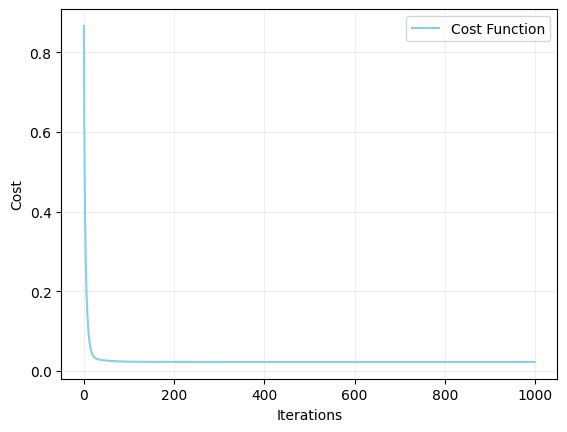

In [28]:
model.plot_cost()

#### Stochastic gradient descent

In [29]:
model.train_stochastic(x_train, y_train)
error = model.test(x_test, y_test)

print(f"[i] R2 Error: {error}")

[i] R2 Error: 0.9318995546874973


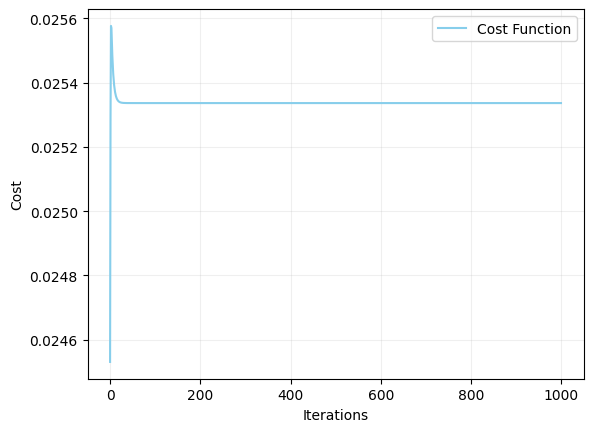

In [30]:
model.plot_cost()

#### Mini-Batch gradient descent

In [31]:
model.train_minibatch(x_train, y_train)
error = model.test(x_test, y_test)

print(f"[i] R2 Error: {error}")

[i] R2 Error: -0.15932726389168428


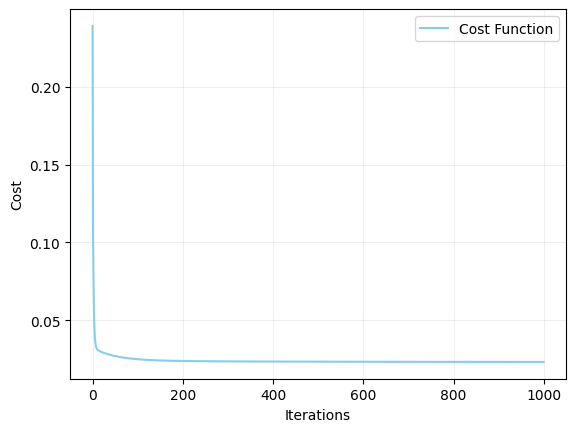

In [32]:
model.plot_cost()

#### Normal Equation

Parameters can also be predicted using the normal equation formula but have some seriouos caveats. Make sure you have an augmented column in the feature matrix.

$
\theta = (X^TX)^{-1}X^TY
$

The caveats include:
1. Should not be a singular matrix (`iris`'s feature matrix is a singular matrix)
2. Should not repeat a statistical unit twice in dataset or else the matrix becomes singular

In [33]:
# augmented_x = np.c_[np.zeros((x.shape[0], 1)), x]
# Here we will encounter the singular matrix error
# *weight, bias = np.linalg.inv(augmented_x.T @ augmented_x) @ augmented_x.T @ y 